# Step 1: Import Needed Libraries and Data

In [2]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df_ml=pd.read_csv('ML_data.csv',sep=',')
df_ml=df_ml.set_index('date')
df_ml.head()

,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
date,,,,,,,
2017-03-10 01:00:00,251.448000,483.4510,55.2,557.434,10.0664,1.74,1.31
2017-03-10 01:00:00,249.887667,473.0805,55.2,563.965,10.0672,1.74,1.31
2017-03-10 01:00:00,249.096667,454.1275,55.2,568.054,10.0680,1.74,1.31
2017-03-10 01:00:00,252.018667,436.9395,55.2,568.665,10.0689,1.74,1.31
2017-03-10 01:00:00,250.349000,439.6745,55.2,558.167,10.0697,1.74,1.31


# Step 2: Create pipelines for various regression machine learning algorithms

In [4]:
# Construct pipelines that:

# 1) Scale the data using MinMaxScaler:
    # From sklearn; This transformer scales and translates each feature individually so that it falls within a specified range, such as between 0 and 1, based on the training set.

# 2) Apply various regression algorithms to the scaled data

pipe_lin = Pipeline([('scaler', MinMaxScaler()), ('Linear Regression', LinearRegression())])
pipe_Ridge = Pipeline([('scaler', MinMaxScaler()), ('Ridge', Ridge())])
pipe_Lasso = Pipeline([('scaler', MinMaxScaler()), ('Lasso', Lasso())])
pipe_KNN = Pipeline([('scaler', MinMaxScaler()), ('KNN Regressor', KNeighborsRegressor())])
pipe_DTR = Pipeline([('scaler', MinMaxScaler()), ('Decision Tree Regressor', DecisionTreeRegressor())])

# Create a list of pipelines for iterative processing
pipelines = [pipe_lin, pipe_Ridge, pipe_Lasso, pipe_KNN, pipe_DTR]

# Define a dictionary to map pipeline indices to algorithm names
pipeline_dict = {0: 'Linear Regression', 1: 'Ridge', 2: 'Lasso', 
                 3: 'KNN Regressor', 4: 'Decision Tree Regressor'}

# Step 3: Split Data into Test and Train sets

In [5]:
# Convert the dataframe into a multidimensional array
array = df_ml.values

# Separate features from the target variable
X = array[:, :-1]  # Features
Y = array[:, -1]   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Display the shapes of the training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242532, 6), (103943, 6), (242532,), (103943,))

In [6]:
# Suppress non-essential warnings
import warnings
warnings.simplefilter('ignore')

# Step 4: Train models and evaluate their performance using cross-validation and RMSE

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

results = []
std = []
for idx, pipeline in enumerate(pipelines):
    kfold = KFold(n_splits=10)  # Using 10-fold cross-validation
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_results)
    results.append(rmse_scores.mean())
    std.append(rmse_scores.std())
    print(f"{pipeline_dict[idx]}: RMSE Score {results[idx]:.3f} (Std: {std[idx]:.3f})")

Linear Regression: RMSE Score 0.817 (Std: 0.003)
Ridge: RMSE Score 0.817 (Std: 0.003)
Lasso: RMSE Score 0.879 (Std: 0.003)
KNN Regressor: RMSE Score 0.382 (Std: 0.005)
Decision Tree Regressor: RMSE Score 0.392 (Std: 0.006)


## Stage 1: KNN Regressor has the best RMSE Score with the a low Standard Deviation, the next step is to validate the model using test Data

# Step 5: Validate Model using Test Data

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Initialize MinMaxScaler and scale the training and test data
scaler = MinMaxScaler()
X_tr_scale = scaler.fit_transform(X_train)
X_te_scale = scaler.transform(X_test)

# Train the KNeighbors Regressor model on the scaled training data
rfr_model = KNeighborsRegressor().fit(X_tr_scale, y_train)

# Make predictions on the scaled test data
y_pred = rfr_model.predict(X_te_scale)

# Calculate and print the final RMSE and R^2 score
Final_mse = mean_squared_error(y_test, y_pred)
Final_rmse = np.sqrt(Final_mse)
print(f'RMSE: {Final_rmse:.3f}')
print(f'R^2: {rfr_model.score(X_te_scale, y_test):.3f}')


RMSE: 0.370
R^2: 0.822


In [9]:
df_ml.head()

,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
date,,,,,,,
2017-03-10 01:00:00,251.448000,483.4510,55.2,557.434,10.0664,1.74,1.31
2017-03-10 01:00:00,249.887667,473.0805,55.2,563.965,10.0672,1.74,1.31
2017-03-10 01:00:00,249.096667,454.1275,55.2,568.054,10.0680,1.74,1.31
2017-03-10 01:00:00,252.018667,436.9395,55.2,568.665,10.0689,1.74,1.31
2017-03-10 01:00:00,250.349000,439.6745,55.2,558.167,10.0697,1.74,1.31


## Staget 2: RMSE Score on test data is fairly close to one gotten on train data, Also R2 value was 0.822-0.9 which is a great fit

In [10]:
# Create a DataFrame to compare predicted and actual values, along with their differences
pred_vs_actual = pd.DataFrame(columns=['Predicted Test Values', 'Actual Test Values', 'Difference'])
pred_vs_actual['Predicted Test Values'] = y_pred
pred_vs_actual['Actual Test Values'] = y_test
pred_vs_actual['Difference'] = pred_vs_actual['Predicted Test Values'] - pred_vs_actual['Actual Test Values']

# Display the first 20 rows of the DataFrame
pred_vs_actual.head(20)

,Predicted Test Values,Actual Test Values,Difference
0,2.210,2.47,-2.600000e-01
1,1.452,1.70,-2.480000e-01
2,1.090,1.09,0.000000e+00
3,1.494,1.46,3.400000e-02
4,3.870,3.87,0.000000e+00
5,1.426,1.15,2.760000e-01
6,1.728,1.68,4.800000e-02
7,1.250,1.25,0.000000e+00
8,1.500,1.59,-9.000000e-02
9,3.730,3.73,-4.440892e-16


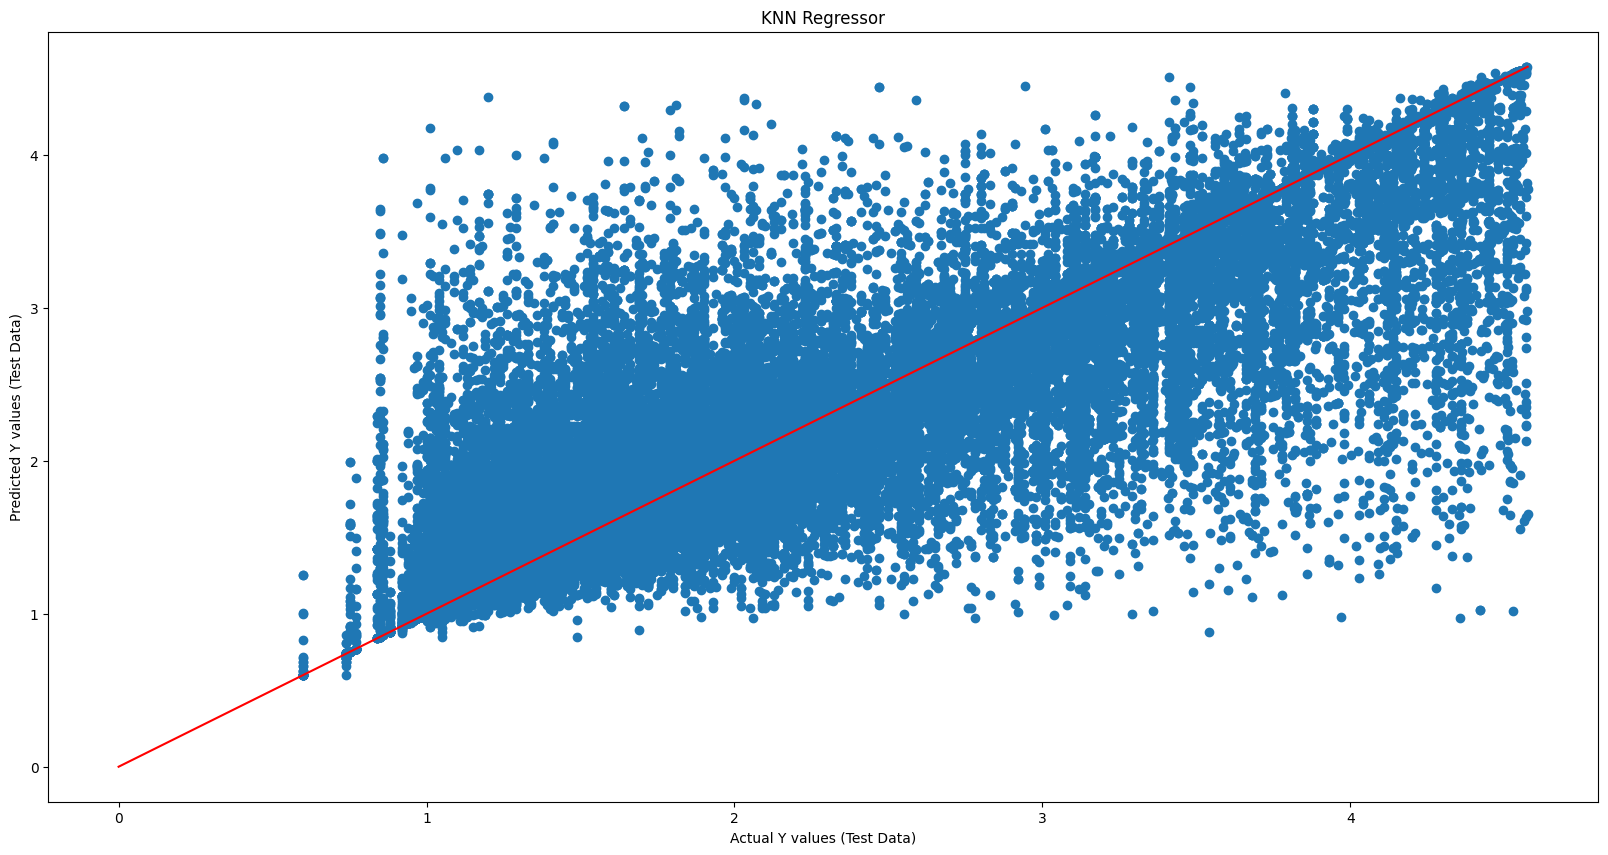

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a scatter plot to visualize the relationship between actual and predicted values
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="KNN Regressor", xlabel="Actual Y values (Test Data)", ylabel="Predicted Y values (Test Data)")
ax.scatter(y_test, y_pred)
ax.plot([0, max(y_test)], [0, max(y_pred)], color='r')  # Add a reference line
fig.show()


In [12]:
def evaluate(predictions, test_data):
    # Calculate the absolute errors between predictions and actual test data
    errors = abs(predictions - test_data)
    # Compute the Mean Absolute Percentage Error (MAPE)
    mape = 100 * np.mean(errors / test_data)
    # Determine the accuracy of the model
    accuracy = 100 - mape
    
    # Print model performance metrics
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy: {:0.2f}%'.format(accuracy))
    
    return accuracy

In [13]:
base_accuracy = evaluate(y_pred, y_test)

Model Performance
Average Error: 0.1715
Accuracy: 91.27%
